In [11]:
# make a module for drawing histogram.
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import chi2
class Hist:
    """
    made by doyeul
    input : function, x range, nunber of bins, Ngen
    """
    def __init__(self,f=lambda x:x**(-1*3/2),xrange=(1.0,10.0),number_of_bins=9,Ngen=10000):
        #define pdf
        self.xrange=xrange
        f_raw=f #unnormalized
        I,error=quad(f_raw,*xrange)   #quad는 구분구적법이란 뜻.
        self.f_pdf= lambda x :f_raw(x)/I

        #make data
        Ngen=Ngen
        x_test = np.linspace(*xrange, 1000)
        M = max(self.f_pdf(x_test)) #최대값(사실 최대값 이상의 아무 값이나 넣으면 되는데 최대값에 가까워야 효율이 좋아짐.
        yrange=(0,M)
        rng=np.random.default_rng()  #인자로 seed 안 넣어도됌.
        r1=rng.uniform(*xrange,size=Ngen) #power law는 np에 기능없음. uniform, acceptance&rejection 으로 구현
        r2=rng.uniform(*yrange,size=Ngen)
        data=[]
        for i,r in enumerate(self.f_pdf(r1)):
            if r2[i]<r:
                data.append(r1[i])
        # make histogram with bin & count
        self.number_of_bin=number_of_bins
        self.n,self.xe=np.histogram(data,bins=self.number_of_bin,range=xrange,density=True)  #density=T->count/N/deltax =pdf  pmf 원할땐 count/N 수동으로 해야함.
        self.pmf=self.n/len(data) #지금 쓰진 않음. value=count/N
        self.bin_width=self.xe[1]-self.xe[0]
        print("bin_width = ",self.bin_width)
      #  print("number of acceptance = ",len(data))
        
        #make distribution
        self.x=np.arange(*xrange,0.1)
        self.y=self.f_pdf(self.x)
    def show(self):
        print("show called!")
        #make figure
        fig =plt.figure(figsize=(8,8))

        #make subplot
        ax1=fig.add_subplot(111)
        ax1.set_xlim(0,self.xrange[1])
        ax1.set_ylim(0,max(self.y)*1.1)
        #plot on the subplot
        ax1.bar(self.xe[0:-1],self.n,width=np.diff(self.xe),align='edge',alpha=0.7,label='count',color='b') #막대로 그리면 align은 의미없음. 다만 카이스케어,fitting 등에선 값이 의미갖음.
        ax1.plot(self.x,self.y,linestyle='--',marker='None',label='given distribution',color='r')

        #show
        plt.legend()
        plt.show()

    def chi_square(self):
        #chi_square
        E=self.f_pdf((self.xe[:-1]+self.xe[1:])/2)  #카이스케어 구할때 align이 의미있음. ->middle
        chi_square=np.sum((self.n-E)**2/E)
        print('middle aligned chi_square = {:.4e} '.format(chi_square))
        #p-value
        df=self.number_of_bin-1   #자유도임. 합이1인 제약조건 때문에 -1
        p = 1 - chi2.cdf(chi_square, df)
       # print('p-value = {:.2e}'.format(p))

        #chi_square
        E=self.f_pdf(self.xe[:-1])  #카이스케어 구할때 align이 의미있음. ->left
        chi_square=np.sum((self.n-E)**2/E)
        print('left aligned chi_square = {:.4e} '.format(chi_square))
        #p-value
        df=self.number_of_bin-1   #자유도임. 합이1인 제약조건 때문에 -1
        p = 1 - chi2.cdf(chi_square, df)
      #  print('p-value = {:.2e}'.format(p))

        #chi_square
        E=self.f_pdf(self.xe[1:])  #카이스케어 구할때 align이 의미있음. ->right
        chi_square=np.sum((self.n-E)**2/E)
        print('right aligned chi_square = {:.4e} '.format(chi_square))
        #p-value
        df=self.number_of_bin-1   #자유도임. 합이1인 제약조건 때문에 -1
        p = 1 - chi2.cdf(chi_square, df)
      #  print('p-value = {:.2e}'.format(p))







In [12]:
import numpy as np
mu = 10
sigma = 3
f = lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
gaus=Hist(f=f, number_of_bins=100 , xrange=(1,19))

bin_width =  0.17999999999999994


In [13]:
gaus.chi_square()

middle aligned chi_square = 1.4506e-01 
left aligned chi_square = 1.5693e-01 
right aligned chi_square = 1.4310e-01 


show called!


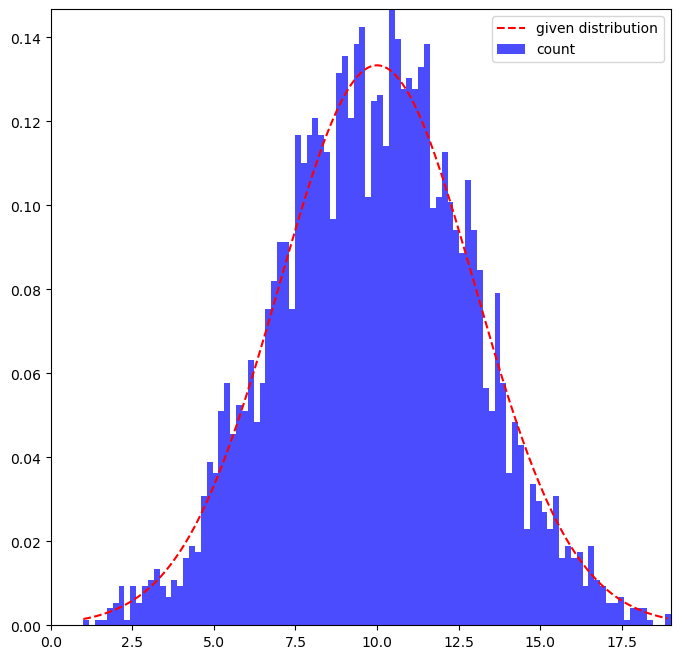

In [14]:
gaus.show()

In [15]:
f = lambda x: x**(-1.5)
power_law=Hist(f=f, number_of_bins=100 , xrange=(1,19))

bin_width =  0.17999999999999994


In [16]:
power_law.chi_square()

middle aligned chi_square = 6.3434e-01 
left aligned chi_square = 6.2073e-01 
right aligned chi_square = 7.0168e-01 


show called!


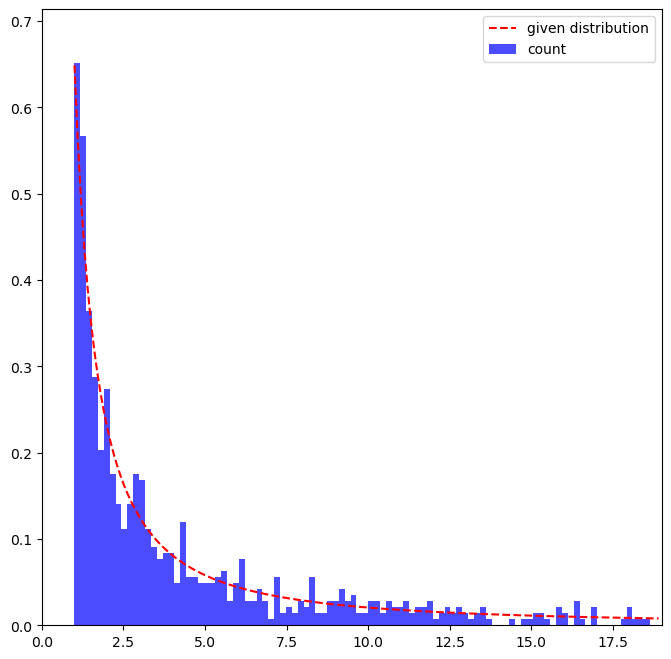

In [17]:
power_law.show()